<a href="https://colab.research.google.com/github/ingridmm/lista-final-TC/blob/main/Trab_Teoria_da_Computa%C3%A7%C3%A3o_Lista_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRABALHO DE TEORIA DA COMPUTAÇÃO
**Universidade Federal do Pará\
Instituto de Ciências Exatas e Naturais\
Programa de Pós-Graduação em Ciência da Computação\
Disciplina: Teoria da Computação\
Professor: Jefferson Morais\
Discente: Ingrid M Miranda**

## 1. Implemente em uma linguagem de programação de sua preferência autômatos de pilha que reconheçam as linguagens:

**a) L = {aⁿ bⁿ cᵐ / n ≥ 0, m ≥ 1}**
> finalizando por pilha vazia



In [ ]:
class PDA:
    def __init__(self):
        self.states = {'q0', 'q1', 'q2', 'q3', 'q4'}
        self.alphabet = {'a', 'b', 'c'}
        self.stack_alphabet = {'$', 'X'}
        self.transitions = {
            'q0': {'a': {'$': ('q1', '$X')}},
            'q1': {'a': {'X': ('q1', 'XX')}, 'b': {'X': ('q2', 'X')}},
            'q2': {'b': {'X': ('q2', 'X')}, 'c': {'X': ('q3', '')}},
            'q3': {'c': {'X': ('q3', '')}},
            'q4': {'c': {'X': ('q3', '')}},
        }
        self.start_state = 'q0'
        self.start_stack_symbol = '$'
        self.accept_states = {'q3'}

    def is_accepted(self, input_string):
        current_state = self.start_state
        stack = [self.start_stack_symbol]

        for symbol in input_string:
            if symbol not in self.alphabet:
                return False

            if stack[-1] in self.transitions[current_state][symbol]:
                current_state, stack_top = self.transitions[current_state][symbol][stack[-1]]
                stack.pop()
                if stack_top != '':
                    stack.extend(stack_top)
            else:
                return False

        return current_state in self.accept_states and len(stack) == 1 and stack[0] == '$'


# Função para obter entradas do usuário
def obter_entradas_do_usuario():
    entradas = []
    while True:
        entrada = input("Digite uma cadeia (ou 'sair' para encerrar): ")
        if entrada.lower() == 'sair':
            break
        entradas.append(entrada)
    return entradas


# Exemplo de uso com entradas do usuário
pda = PDA()
entradas_usuario = obter_entradas_do_usuario()

for entrada in entradas_usuario:
    if pda.is_accepted(entrada):
        print(f"A cadeia '{entrada}' é aceita pelo autômato de pilha.")
    else:
        print(f"A cadeia '{entrada}' não é aceita pelo autômato de pilha.")

Digite uma cadeia (ou 'sair' para encerrar): aabbcc
Digite uma cadeia (ou 'sair' para encerrar): sair
A cadeia 'aabbcc' é aceita pelo autômato de pilha.


**b) L = {aⁿ b³ⁿ / n ≥ 1}**
> parada por estado final



In [ ]:
class Stack:
    def __init__(self):
        self.stack = []
        self.size = 0

    def push(self, elemento):
        self.stack.append(elemento)
        self.size += 1

    def pop(self):
        if self.size > 0:
            self.size -= 1
            return self.stack.pop()
        raise IndexError('A pilha está vazia')

    def peek(self):
        if self.size > 0:
            return self.stack[-1]
        raise IndexError('A pilha está vazia')

    def is_empty(self):
        return self.size == 0

    def print_stack(self):
        print(f"Pilha: {self}")

    def __str__(self):
        return ' -> '.join(str(x) for x in self.stack)


class PDA:
    def __init__(self):
        self.states = {'q0', 'q1', 'q2'}
        self.alphabet = {'a', 'b'}
        self.stack_alphabet = {'$', 'X'}
        self.transitions = {
            'q0': {'a': {'$': ('q1', 'X')}},
            'q1': {'a': {'X': ('q1', 'XX')}, 'b': {'X': ('q2', 'X')}},
            'q2': {'b': {'X': ('q2', 'X')}, '$': ('q0', '$')}
        }
        self.start_state = 'q0'
        self.start_stack_symbol = '$'
        self.accept_states = {'q0', 'q2'}  # Modificado para aceitar pilha vazia em q0
        self.stack = Stack()

    def is_accepted(self, input_string):
          current_state = self.start_state
          self.stack.push(self.start_stack_symbol)

          print("Início:", f"Pilha: {self.stack}")

          for symbol in input_string:
              if symbol not in self.alphabet:
                  return False

              if current_state in self.transitions and symbol in self.transitions[current_state]:
                  if self.stack.peek() in self.transitions[current_state][symbol]:
                      current_state, stack_top = self.transitions[current_state][symbol][self.stack.peek()]
                      self.stack.pop()
                      if stack_top:
                          for element in reversed(stack_top):
                              self.stack.push(element)
                      print(f"Transição: {current_state} --({symbol}, {self.stack.peek()})--> "
                            f"('{self.transitions[current_state][symbol][self.stack.peek()]}')"
                            f", Pilha: {self.stack}")
                      self.stack.print_stack()
                  else:
                      return False
              else:
                  return False

          if current_state not in self.accept_states:
              return False

          print(f"Cadeia aceita! Estado final alcançado: {current_state}")
          return True


# Função para obter entradas do usuário
def obter_entradas_do_usuario():
    entradas = []
    while True:
        entrada = input("Digite uma cadeia (ou 'sair' para encerrar): ")
        if entrada.lower() == 'sair':
            break
        entradas.append(entrada)
    return entradas


# Exemplo de uso com entradas do usuário
pda = PDA()
entradas_usuario = obter_entradas_do_usuario()

for entrada in entradas_usuario:
    if pda.is_accepted(entrada):
        print(f"A cadeia '{entrada}' é aceita pelo autômato de pilha.")
    else:
        print(f"A cadeia '{entrada}' não é aceita pelo autômato de pilha.")

Digite uma cadeia (ou 'sair' para encerrar): abbbbbb
Digite uma cadeia (ou 'sair' para encerrar): sair
Início: Pilha: $
Transição: q1 --(a, X)--> ('('q1', 'XX')'), Pilha: X
Pilha: X
Transição: q2 --(b, X)--> ('('q2', 'X')'), Pilha: X
Pilha: X
Transição: q2 --(b, X)--> ('('q2', 'X')'), Pilha: X
Pilha: X
Transição: q2 --(b, X)--> ('('q2', 'X')'), Pilha: X
Pilha: X
Transição: q2 --(b, X)--> ('('q2', 'X')'), Pilha: X
Pilha: X
Transição: q2 --(b, X)--> ('('q2', 'X')'), Pilha: X
Pilha: X
Transição: q2 --(b, X)--> ('('q2', 'X')'), Pilha: X
Pilha: X
Cadeia aceita! Estado final alcançado: q2
A cadeia 'abbbbbb' é aceita pelo autômato de pilha.


## 2. Implemente em linguagem de programação à sua escolha o algoritmo CYK. Seu programa deve receber como entrada uma gramática livre de contexto na Forma Normal de Chomsky e uma string de teste da gramática. Descreve como deverá ser o formato dessa gramática.

In [ ]:
from tabulate import tabulate

def ler_gramatica(file_path):
    with open(grammar_file_path, 'r') as gramatica:
        regras = gramatica.read().splitlines()
        regras_terminais = []
        regras_variaveis = []

        for linha in regras:
            lado_esquerdo, lado_direito = linha.strip().split(" -> ")
            lado_direito = lado_direito.split(" | ")

            for letra in lado_direito:
                if(str.islower(letra)):
                    regras_terminais.append([lado_esquerdo, letra])
                else:
                    regras_variaveis.append([lado_esquerdo, letra])

        return regras_variaveis, regras_terminais


def printTable(table, input_word):
    print("Tabela CYK:")
    headers = [""] + list(input_word)
    table_str = tabulate(table, headers, tablefmt="grid", showindex="always")

    # Substituir set() por Ø na tabela
    table_str = table_str.replace("set()", "Ø")

    print(table_str)


def cyk(reg_variaveis, reg_terminais, entrada):
    tamanho = len(entrada)

    variaveis_pos_0 = [var[0] for var in reg_variaveis]
    variaveis_pos_1 = [var[1] for var in reg_variaveis]

    tabela = [[set() for _ in range(tamanho-i)] for i in range(tamanho)]

    for i in range(tamanho):
        for regra in reg_terminais:
            if entrada[i] == regra[1]:
                tabela[0][i].add(regra[0])

    for i in range(1, tamanho):
        for j in range(tamanho - i):
            for k in range(i):
                conjunto_valores = set()

                if (tabela[k][j] == set() or tabela[i-k-1][j+k+1] == set()):
                    combinacoes = set()
                for primeira_letra in tabela[k][j]:
                    for segunda_letra in tabela[i-k-1][j+k+1]:
                        conjunto_valores.add(primeira_letra+segunda_letra)
                combinacoes = conjunto_valores

                for combinacao in combinacoes:
                  if combinacao in variaveis_pos_1:
                      tabela[i][j].add(
                          variaveis_pos_0[variaveis_pos_1.index(combinacao)])
                  elif len(combinacao) == 2 and combinacao[0] in variaveis_pos_1 and combinacao[1] in variaveis_pos_1:
                      tabela[i][j].add(combinacao)


    printTable(tabela, entrada)

    if ('S') in tabela[len(entrada)-1][0]:
        print(entrada, "pertence à gramática")
    else:
        print(entrada, "não pertence à gramática")
    return tabela



if __name__ == '__main__':
    # Solicita o caminho do arquivo contendo a gramática
    grammar_file_path = "/content/gramatica.txt"

    # Solicita a palavra de teste
    palavra = input("Escreva uma palavra:\n")

    # Lê a gramática do arquivo
    r_variaveis, r_terminais = ler_gramatica(grammar_file_path)

    # Executa o algoritmo CYK e exibe o resultado
    teste = cyk(r_variaveis, r_terminais, palavra)



Escreva uma palavra:
aabbcc
CYK Table:
+----+-------+-------+-------+-------+------------+------------+
|    | a     | a     | b     | b     | c          | c          |
+====+=======+=======+=======+=======+============+============+
|  0 | {'C'} | {'C'} | {'D'} | {'D'} | {'E', 'B'} | {'E', 'B'} |
+----+-------+-------+-------+-------+------------+------------+
|  1 | Ø | {'A'} | Ø | Ø | {'B'}      |            |
+----+-------+-------+-------+-------+------------+------------+
|  2 | Ø | {'F'} | Ø | Ø |            |            |
+----+-------+-------+-------+-------+------------+------------+
|  3 | {'A'} | Ø | Ø |       |            |            |
+----+-------+-------+-------+-------+------------+------------+
|  4 | {'S'} | Ø |       |       |            |            |
+----+-------+-------+-------+-------+------------+------------+
|  5 | {'S'} |       |       |       |            |            |
+----+-------+-------+-------+-------+------------+------------+
aabbcc pertence à gram

> gramática usada no exemplo

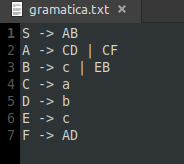

##3. Desenvolva Máquinas de Turing que decidam as linguagens abaixo. Máquinas podem ser feitas no software JFLAP e devem conter o diagrama de transição de estados e um conjunto de testes experimentais.

**a) L = {aⁱ bʲ cᵏ | i, j, k ≥ 0 e i = j ou j = k}**


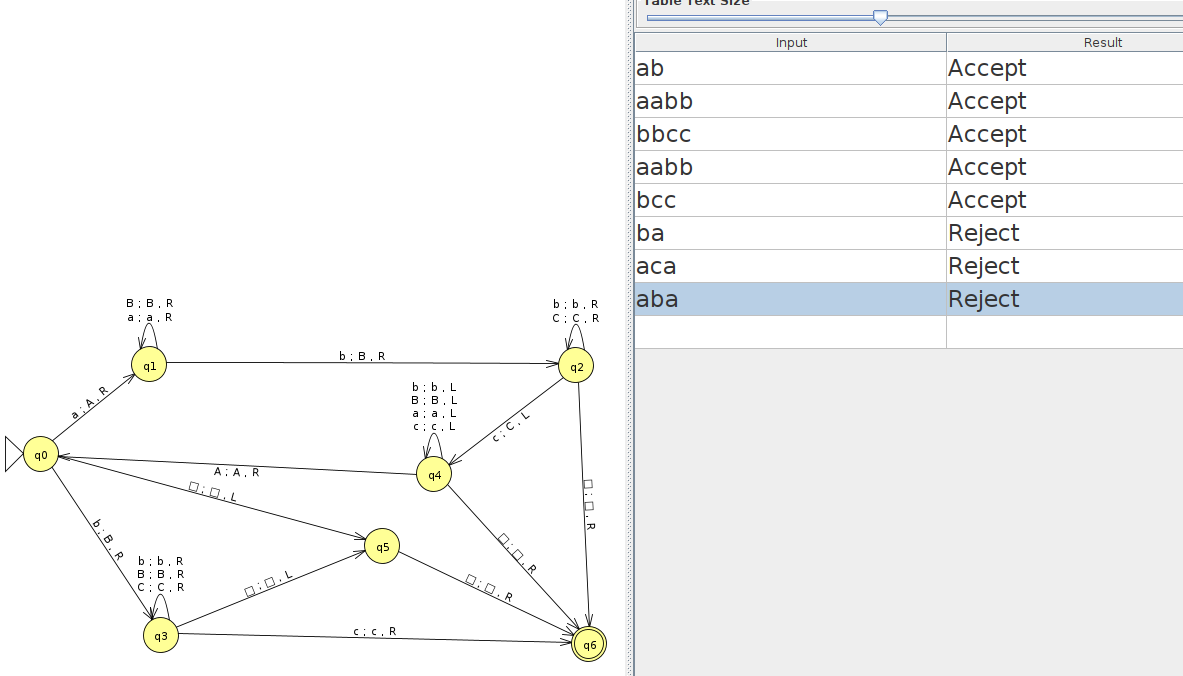

**b) L = {aⁿ bⁿ cⁿ | n ≥ 0}**


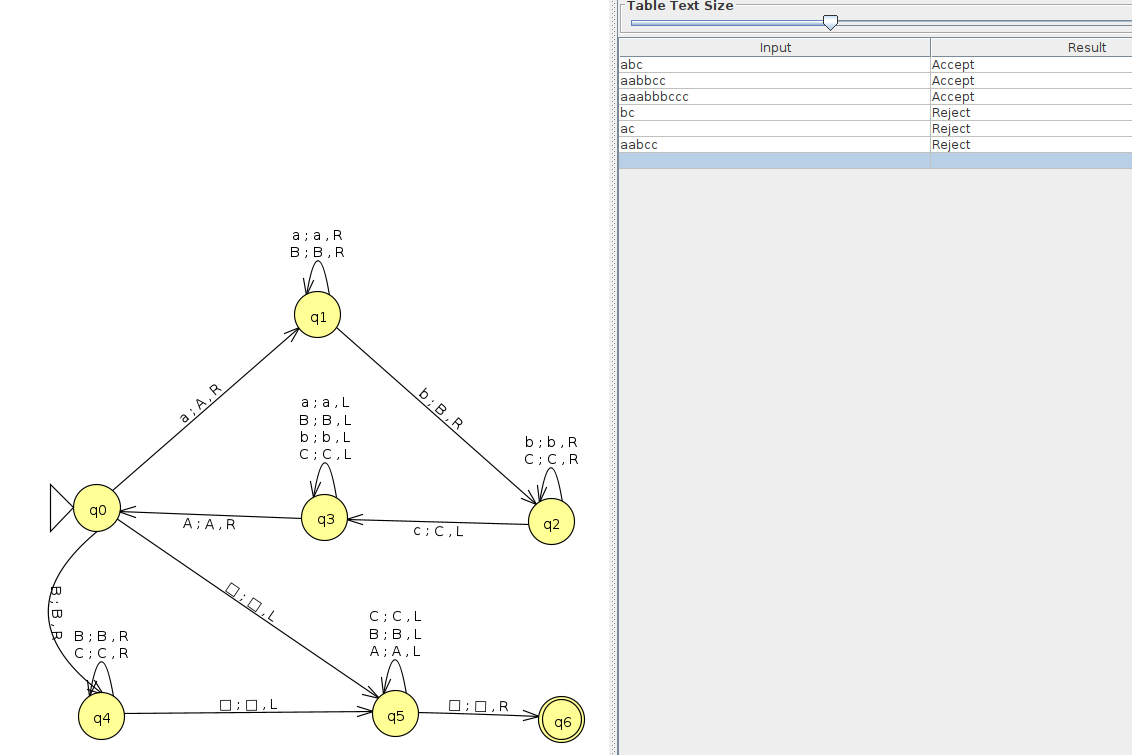